In [1]:
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("mako")

In [2]:
SEED = 42

#### Load the data

In [3]:
train_data = pd.read_csv("data/train.csv")

In [4]:
result_data = pd.read_csv("data/test.csv")
result_index = result_data["ID"]

In [5]:
train_data.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [6]:
train_data.drop(columns="ID", inplace=True)
result_data.drop(columns="ID", inplace=True)

In [7]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,333.0,3.360341,7.352272,0.00632,0.07896,0.26169,3.67822,73.5341
zn,333.0,10.689189,22.674762,0.00000,0.00000,0.00000,12.50000,100.0000
indus,333.0,11.293483,6.998123,0.74000,5.13000,9.90000,18.10000,27.7400
chas,333.0,0.060060,0.237956,0.00000,0.00000,0.00000,0.00000,1.0000
nox,333.0,0.557144,0.114955,0.38500,0.45300,0.53800,0.63100,0.8710
rm,333.0,6.265619,0.703952,3.56100,5.88400,6.20200,6.59500,8.7250
age,333.0,68.226426,28.133344,6.00000,45.40000,76.70000,93.80000,100.0000
dis,333.0,3.709934,1.981123,1.12960,2.12240,3.09230,5.11670,10.7103
rad,333.0,9.633634,8.742174,1.00000,4.00000,5.00000,24.00000,24.0000
tax,333.0,409.279279,170.841988,188.00000,279.00000,330.00000,666.00000,711.0000


#### Data Description
|Name|Description|Type|Notes|
|---|---|---|---|
|<b>crim</b>| per capita crime rate by town.|Numeric||
|<b>zn</b>| proportion of residential land zoned for lots over 25,000 sq.ft.|Numeric||
|<b>indus</b>| proportion of non-retail business acres per town.|Numeric||
|<b>chas</b>| Charley River dummy variable (= 1 if tract bounds river; 0 otherwise).|Categorical||
|<b>nox</b>| nitrogen oxides concentration (parts per 10 million).|Numeric||
|<b>rm</b>| average number of rooms per dwelling.|Numeric||
|<b>age</b>| proportion of owner-occupied units build prior to 1940.|Numeric||
|<b>dis</b>| weighted mean of distances to five Boston employment centres.|Numeric||
|<b>rad</b>| index of accessibility to radial highways.|Numeric||
|<b>tax</b>| full-value property-tax rate per \$10.000.|Numeric||
|<b>ptratio</b>| pupil-teacher ratio by town.|Numeric||
|<b>black</b>| 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.|Numeric||
|<b>lstat</b>| lower status of the population (percent).|Numeric||
|<b>medv</b> |median value of owner-occupied homes in $1000s.|Numeric|Target variable|

#### Exploratory data analysis
##### Histograms and Kernel Density Estimation

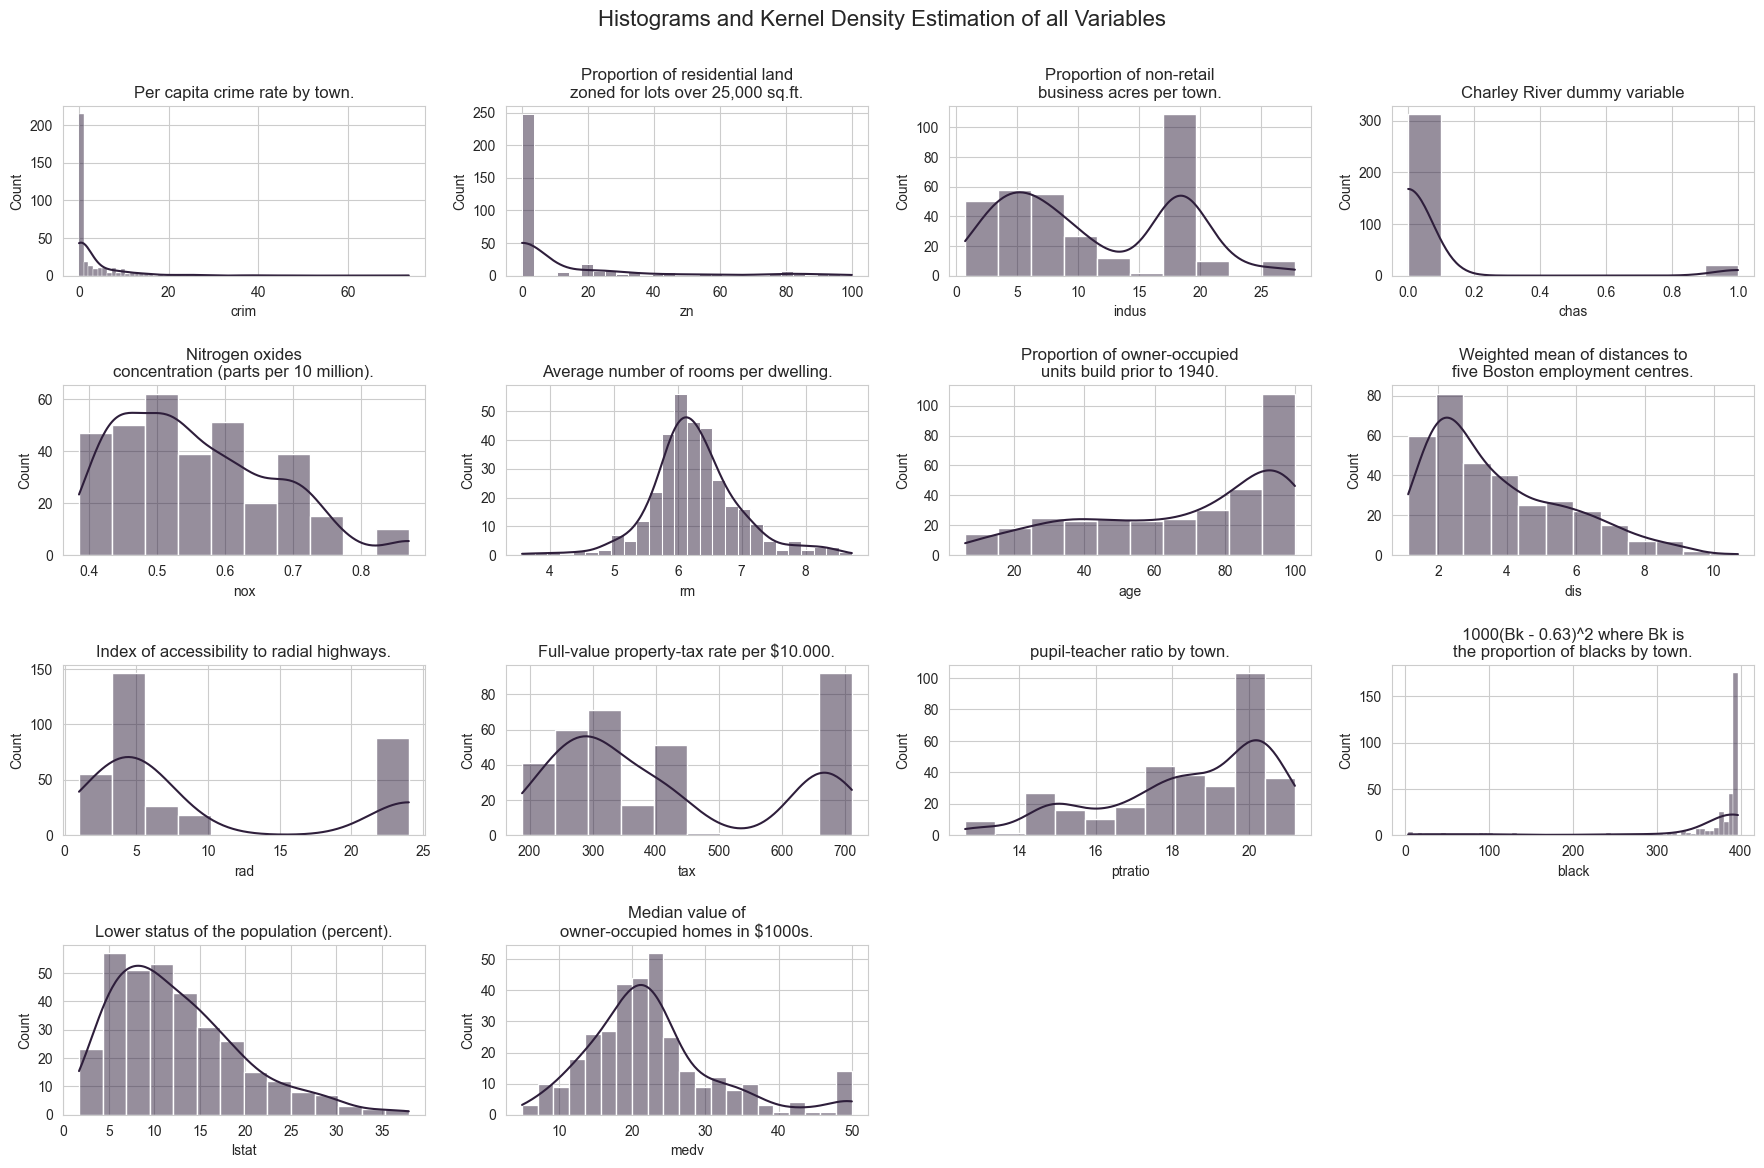

In [8]:
selected_columns = train_data.columns[0:15]

plot_names = [
    "Per capita crime rate by town.",
    "Proportion of residential land\nzoned for lots over 25,000 sq.ft.",
    "Proportion of non-retail\nbusiness acres per town.",
    "Charley River dummy variable",
    "Nitrogen oxides\nconcentration (parts per 10 million).",
    "Average number of rooms per dwelling.",
    "Proportion of owner-occupied\nunits build prior to 1940.",
    "Weighted mean of distances to\nfive Boston employment centres.",
    "Index of accessibility to radial highways.",
    "Full-value property-tax rate per $10.000.",
    "pupil-teacher ratio by town.",
    "1000(Bk - 0.63)^2 where Bk is\nthe proportion of blacks by town.",
    "Lower status of the population (percent).",
    "Median value of\nowner-occupied homes in $1000s."
]

# Create a grid of histograms
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
fig.suptitle("Histograms and Kernel Density Estimation of all Variables", fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the selected columns and create histograms
for i, (column, plot_name) in enumerate(zip(selected_columns, plot_names)):
    sns.histplot(train_data[column], ax=axes[i], kde=True)
    axes[i].set_title(plot_name)
    axes[i].set_xlabel(column)

# Remove any empty subplots if necessary
for j in range(len(selected_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout with increased spacing
plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.9)

# Show the combined figure with histograms
plt.show()

##### Correlation Heatmap

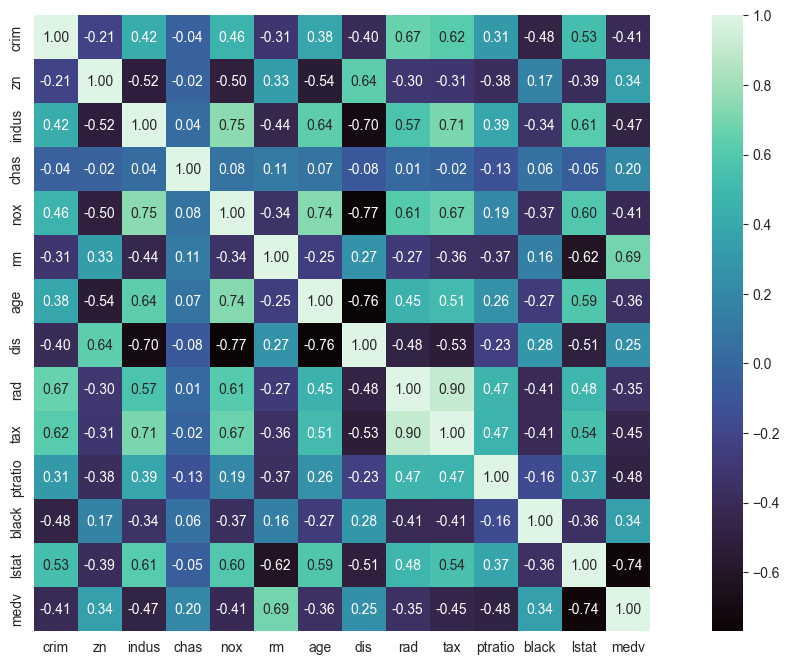

In [9]:
plt.figure(figsize=(16, 8))
corr = train_data.corr()
sns.heatmap(corr, annot=True, cmap="mako", square = True, fmt='.2f');

<b>rad and tax have 90% correlation</b>

#### Preprocessing

##### train, validation, result split

In [10]:
from sklearn import model_selection

X, y = train_data[train_data.columns.difference(['medv'])], train_data["medv"]
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.33, shuffle=True, random_state=SEED)

X_result = result_data.copy()
assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

##### Encode categorical features

In [11]:
from sklearn import preprocessing

# X_train
encoder = preprocessing.OneHotEncoder()
encoded_column = encoder.fit_transform(X_train[["chas"]])
one_hot_encoded_df = pd.DataFrame(encoded_column.toarray(), columns=["chas_negative", "chas_positive"], index=X_train.index)
X_train.drop(columns="chas", inplace=True)
X_train = pd.concat([X_train, one_hot_encoded_df], axis=1)

# X_val
encoder = preprocessing.OneHotEncoder()
encoded_column = encoder.fit_transform(X_val[["chas"]])
one_hot_encoded_df = pd.DataFrame(encoded_column.toarray(), columns=["chas_negative", "chas_positive"], index=X_val.index)
X_val.drop(columns="chas", inplace=True)
X_val = pd.concat([X_val, one_hot_encoded_df], axis=1)

# X_result
encoder = preprocessing.OneHotEncoder()
encoded_column = encoder.fit_transform(X_result[["chas"]])
one_hot_encoded_df = pd.DataFrame(encoded_column.toarray(), columns=["chas_negative", "chas_positive"], index=X_result.index)
X_result.drop(columns="chas", inplace=True)
X_result = pd.concat([X_result, one_hot_encoded_df], axis=1)

In [12]:
X_train.head(5)

,age,black,crim,dis,indus,lstat,nox,ptratio,rad,rm,tax,zn,chas_negative,chas_positive
39,66.2,395.11,0.14932,7.2254,5.13,13.15,0.453,19.7,8,5.741,284,25.0,1.0,0.0
310,75.0,393.37,3.56868,2.8965,18.10,14.36,0.580,20.2,24,6.437,666,0.0,1.0,0.0
104,96.0,321.02,1.41385,1.7494,19.58,15.12,0.871,14.7,5,6.129,403,0.0,0.0,1.0
155,86.5,387.38,0.38214,3.2157,6.20,3.13,0.504,17.4,8,8.040,307,0.0,1.0,0.0
193,45.6,396.90,0.04590,7.3172,5.32,7.60,0.405,16.6,6,6.315,293,52.5,1.0,0.0


In [13]:
X_train = X_train.sort_index(axis=1)
X_val = X_val.sort_index(axis=1)
X_result = X_result.sort_index(axis=1)

#### Standardization of Features

In [14]:
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#X_train = X_train.sort_index(axis=1)

X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
#X_val = X_val.sort_index(axis=1)

X_result = pd.DataFrame(scaler.transform(X_result), columns=X_result.columns)
#X_result = X_result.sort_index(axis=1)

In [15]:
X_train.head(5)

,age,black,chas_negative,chas_positive,crim,dis,indus,lstat,nox,ptratio,rad,rm,tax,zn
0,-0.008357,0.413065,0.248807,-0.248807,-0.420546,1.683420,-0.851588,0.115873,-0.844302,0.584569,-0.195637,-0.790491,-0.734572,0.516264
1,0.297610,0.392942,0.248807,-0.248807,0.028124,-0.431431,1.036955,0.284079,0.210791,0.825528,1.641290,0.224428,1.538165,-0.488333
2,1.027760,-0.443763,-4.019185,4.019185,-0.254621,-0.991838,1.252456,0.389730,2.628367,-1.825022,-0.540061,-0.224703,-0.026573,-0.488333
3,0.697454,0.323670,0.248807,-0.248807,-0.389997,-0.275488,-0.695787,-1.277039,-0.420603,-0.523843,-0.195637,2.561951,-0.597732,-0.488333
4,-0.724599,0.433765,0.248807,-0.248807,-0.434116,1.728268,-0.823923,-0.655650,-1.243077,-0.909377,-0.425253,0.046526,-0.681026,1.621321


#### Training

##### Scikit-learn

In [16]:
from sklearn import ensemble, gaussian_process, linear_model, kernel_ridge, neighbors, svm, tree, metrics
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

import xgboost as xgb
import lightgbm as lgb
import catboost

from tqdm import tqdm

models = [
    # sklearn models
    ("LinearRegression", linear_model.LinearRegression(), None),
    ("Ridge", linear_model.Ridge(), {"alpha": [0.5, 0.75, 1, 1.5, 2]}),
    ("Lasso", linear_model.Lasso(), {"alpha": [0.5, 0.75, 1, 1.5, 2]}),
    ("ElasticNet", linear_model.ElasticNet(), {"alpha": [0.5, 0.75, 1, 1.5, 2]}),
    ("GradientBoostingRegressor", ensemble.GradientBoostingRegressor(), {"learning_rate": [0.1, 0.01], "n_estimators": [10, 50, 100, 200]}),
    ("RandomForestRegressor", ensemble.RandomForestRegressor(), {"n_estimators": [10, 50, 100, 200]}),
    ("GaussianProcessRegressor", gaussian_process.GaussianProcessRegressor(), {
        "kernel": [None, gaussian_process.kernels.RBF(), gaussian_process.kernels.Matern(), gaussian_process.kernels.DotProduct()]}),
    ("TweedieRegressor", linear_model.TweedieRegressor(), {"alpha": [0.5, 0.75, 1, 1.5, 2], "power": [0, 1, 2, 3]}),
    ("KernelRidge", kernel_ridge.KernelRidge(), {"kernel": ["linear", "rbf", "polynomial"], "alpha": [0.5, 0.75, 1, 1.5, 2]}),
    ("KNeighborsRegressor", neighbors.KNeighborsRegressor(), {"n_neighbors": [5, 20, 50, 100], "weights": ["uniform", "distance"]}),
    ("LinearSVR", svm.LinearSVR(dual="auto"), {"C": [0.5, 1, 2]}),
    ("DecisionTreeRegressor", tree.DecisionTreeRegressor(), None),
    
    # third party models
    ("XGBRegressor", xgb.XGBRegressor(), {
        "n_estimators": [10, 50, 100, 200], "learning_rate": [0.1, 0.01], "max_leaves": [0, 10, 31, 50]}),
    ("LGBMRegressor", lgb.LGBMRegressor(verbose=-1), {
        "n_estimators": [10, 50, 100, 200], "learning_rate": [0.1, 0.01], "num_leaves": [10, 31, 50], "boosting_type": ["gbdt", "dart"]}),
    ("CatBoostRegressor", catboost.CatBoostRegressor(silent=True), {
        "n_estimators": [None, 10, 50, 100, 200], "learning_rate": [0.1, 0.01]}),
]
trained_models = {}

results = {}
for name, model, tuning_params in tqdm(models):
    if tuning_params:
        grid_search = model_selection.GridSearchCV(model, tuning_params, scoring="neg_root_mean_squared_error")
        grid_search.fit(X_train, y_train)
        trained_models[name] = grid_search
        y_val_pred = grid_search.predict(X_val)
    else:
        model.fit(X_train, y_train)
        trained_models[name] = model
        y_val_pred = model.predict(X_val)
        
    rmse = metrics.mean_squared_error(y_true=y_val, y_pred=y_val_pred, squared=False)
    results[name] = rmse

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [01:01<00:00,  4.13s/it]


##### PyTorch

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataloader import default_collate

##### Create Dataset

In [18]:
class PandasDataset(Dataset):
    def __init__(self, train_x, train_y):
        self.X_train = torch.tensor(train_x.values, dtype=torch.float32)
        self.y_train = torch.tensor(train_y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.y_train)

    def __getitem__(self, idx):
        return self.X_train[idx], self.y_train[idx]

##### Create DataLoader

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"

train_dataloader = DataLoader(
    PandasDataset(X_train, y_train), 
    batch_size=8, 
    collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)), 
    shuffle=False)

val_dataloader = DataLoader(
    PandasDataset(X_val, y_val), 
    batch_size=8, 
    collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)), 
    shuffle=False)

##### Define Dense Neural Network

In [20]:
class Dense_Neural_Net(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        modules = []

        modules.append(nn.Linear(in_features=in_features, out_features=16))
        modules.append(nn.LeakyReLU())
        modules.append(nn.Dropout(0.3))
        modules.append(nn.Linear(in_features=16, out_features=32))
        modules.append(nn.LeakyReLU())
        modules.append(nn.Linear(in_features=32, out_features=64))
        modules.append(nn.LeakyReLU())
        modules.append(nn.Linear(in_features=64, out_features=128))
        modules.append(nn.LeakyReLU())
        modules.append(nn.Linear(in_features=128, out_features=256))
        modules.append(nn.LeakyReLU())
        modules.append(nn.Linear(in_features=256, out_features=1))
        
        self.model = nn.Sequential(*modules)
    
    def forward(self, x):
        return self.model(x).flatten()

    def weights_init(self, m):
        if isinstance(m, nn.Linear):
            nn.init.kaiming_uniform_(m.weight.data, nonlinearity='leaky_relu')
            nn.init.zeros_(m.bias)

##### Define Convolutional Neural Network

In [21]:
class Convolutional_Neural_Net(nn.Module):
    def __init__(self):
        super().__init__()
        modules = []

        modules.append(nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, stride=1))
        modules.append(nn.LeakyReLU())
        modules.append(nn.Dropout(0.3))
        modules.append(nn.MaxPool1d(kernel_size=2))
        modules.append(nn.Conv1d(in_channels=64, out_channels=64, kernel_size=3, stride=1))
        modules.append(nn.LeakyReLU())
        modules.append(nn.MaxPool1d(kernel_size=2))
        modules.append(nn.Flatten())
        
        modules.append(nn.Linear(128, 64))
        modules.append(nn.LeakyReLU())
        modules.append(nn.Linear(64, 64))
        modules.append(nn.LeakyReLU())
        modules.append(nn.Linear(64, 1))
        
        self.model = nn.Sequential(*modules)

    def forward(self, x):
        return self.model(x).flatten()

    def weights_init(self, m):
        if isinstance(m, (nn.Linear, nn.Conv1d)):
            nn.init.kaiming_uniform_(m.weight.data, nonlinearity='leaky_relu')
            nn.init.zeros_(m.bias)

##### Train Dense Neural Network

In [22]:
epochs = 1000
lr = 1e-3
weight_decay = 1e-3

dnn_model = Dense_Neural_Net(in_features=14)
dnn_model.apply(dnn_model.weights_init)
dnn_model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(dnn_model.parameters(), lr=lr, weight_decay=weight_decay)

rmse_scores = []
dnn_training_losses = []

for epoch in tqdm(range(epochs)):
    dnn_model.train()
    running_loss = 0.0
    for batch in train_dataloader:
        data, label = batch[0], batch[1]
        y_pred = dnn_model(data)
        loss = criterion(y_pred, label)
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    dnn_training_losses.append(running_loss/len(train_dataloader))

    dnn_model.eval()
    predictions = []
    with torch.no_grad():
        for batch in val_dataloader:
            data, label = batch[0], batch[1]
            y_val_pred = dnn_model(data).cpu().numpy()
            predictions.extend(y_val_pred)
    rmse = metrics.mean_squared_error(y_true=y_val, y_pred=predictions, squared=False)
    rmse_scores.append(rmse)
results["DNN_model"] = rmse_scores[-1]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:27<00:00, 11.47it/s]


##### Train Convolutional Neural Network

In [ ]:
epochs = 1000
lr = 1e-4
weight_decay = 1e-4

cnn_model = Convolutional_Neural_Net()
cnn_model.apply(cnn_model.weights_init)
cnn_model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=lr, weight_decay=weight_decay)

rmse_scores = []
cnn_training_losses = []

for epoch in tqdm(range(epochs)):
    cnn_model.train()
    running_loss = 0.0
    for batch in train_dataloader:
        data, label = batch[0].unsqueeze(1), batch[1]
        y_pred = cnn_model(data)
        loss = criterion(y_pred, label)
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    cnn_training_losses.append(running_loss/len(train_dataloader))

    cnn_model.eval()
    predictions = []
    with torch.no_grad():
        for batch in val_dataloader:
            data, label = batch[0].unsqueeze(1), batch[1]
            y_val_pred = cnn_model(data).cpu().numpy()
            predictions.extend(y_val_pred)
    rmse = metrics.mean_squared_error(y_true=y_val, y_pred=predictions, squared=False)
    rmse_scores.append(rmse)
#results = {}
results["CNN_model"] = rmse_scores[-1]

 74%|██████████████████████████████████████████████████████████                     | 735/1000 [01:12<00:29,  9.08it/s]

In [ ]:
results = sorted(list(results.items()), key=lambda x: x[1])
for name, score in results:
    print(f"{name}: RMSE: {score:.2f}")

In [ ]:
# Extract model names and RMSE values from the list of tuples
model_names, rmse_values = zip(*results)

# Create a bar plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Create subplots with two columns

# Bar plot on the left
axes[0].barh(model_names, rmse_values)
axes[0].set_xlabel('RMSE (Root Mean Square Error)')
axes[0].set_title('RMSE for Different Regression Models')
axes[0].invert_yaxis()  # Invert the y-axis to display the best model on top

# Line plot on the right
sns.lineplot(x=range(len(cnn_training_losses)), y=cnn_training_losses, ax=axes[1], legend="auto", label="CNN_model")
sns.lineplot(x=range(len(dnn_training_losses)), y=dnn_training_losses, ax=axes[1], legend="auto", label="DNN_model")
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Training Loss')
axes[1].set_yscale('log')
axes[1].set_title('Training Loss over Time')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#### Create final Predictions

In [ ]:
final_model = trained_models["GradientBoostingRegressor"]

In [ ]:
y_result = final_model.predict(X_result)

In [ ]:
final_result = pd.DataFrame(y_result, columns=["medv"])
final_result.index = result_index

In [ ]:
final_result.head(5)

In [ ]:
final_result.to_csv("data/submission.csv")